# importing necessary libraries

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# get data

In [2]:
data= pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# checking for null values 
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# visualization

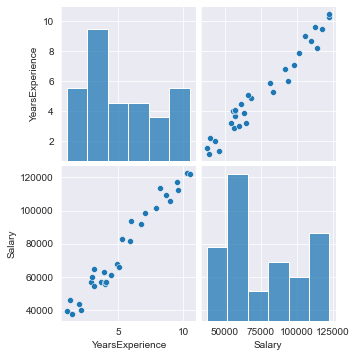

In [6]:
# histogram and scatter plot
sns.set_style(style='darkgrid')
sns.pairplot(data)

C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

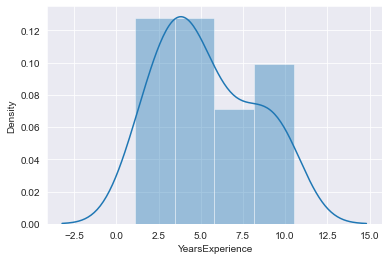

In [7]:
sns.distplot(data['YearsExperience'])

C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

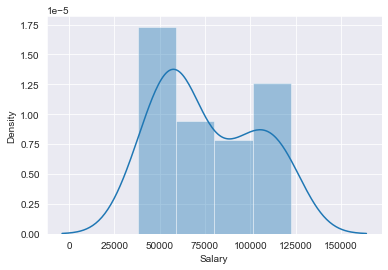

In [8]:
sns.distplot(data['Salary'])

In [10]:
# scatter plot using matplotlib

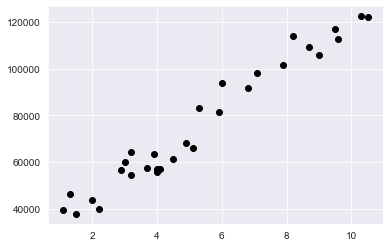

In [9]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'] , color = 'black')

In [12]:
# correlation

In [10]:
corr = data.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

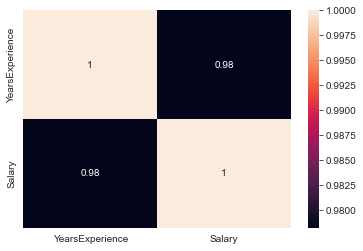

In [11]:
sns.heatmap(corr,annot=True)

In [12]:
# saperating variables
x = data[['YearsExperience']]
y = data[['Salary']]

In [16]:
# Linear Regression 

In [13]:
LR = LinearRegression()
model = LR.fit(x,y)

In [14]:
coeff = model.coef_
coeff

array([[9449.96232146]])

In [15]:
# intercept
intercept = model.intercept_
intercept

array([25792.20019867])

In [16]:
# cross-verifying the linear equation with a single x value using coefficient and intercept
# taking Year of experience (x) = 2.0 of index 3 having Salary =43525.0
s = coeff*(2.0)+intercept
s # nearly same

array([[44692.12484158]])

In [17]:
pred = model.predict(x)
pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [22]:
 # measuring r2 score , mse and rmse values 

In [18]:
r2_value = r2_score(y,pred)
r2_value # 95 % accuracy is achieved 

0.9569566641435086

In [19]:
mse = mean_squared_error(y,pred)
mse

31270951.722280957

In [20]:
rmse = np.sqrt(mse)
rmse

5592.043608760661

In [26]:
# apply log transformation to check for any improvement in r^2 value 

In [21]:
model_log = LR.fit(np.log(x),y)

In [22]:
# for bias 
coeff_log = model_log.coef_
coeff_log

array([[40581.98795978]])

In [23]:
# for intercept
intercept_log = model_log.intercept_
intercept_log

array([14927.97177006])

In [24]:
# cross-verifying the linear equation with a single x value using coefficient and intercept
# taking Year of experience (x) = 2.0 of index 3 having Salary =43525.0
s_log= coeff_log*(2.0)+intercept_log
s_log # error is very high not a good model lets check r2_ score to confirm

array([[96091.94768962]])

In [25]:
pred_log = LR.predict(np.log(x))
pred_log

array([[ 18795.84833932],
       [ 25575.23519175],
       [ 31382.55190541],
       [ 43057.2623059 ],
       [ 46925.13887516],
       [ 58136.05007933],
       [ 59511.84244125],
       [ 62130.943929  ],
       [ 62130.943929  ],
       [ 68022.71850448],
       [ 70159.10586295],
       [ 71186.55284173],
       [ 71186.55284173],
       [ 72188.62814857],
       [ 75966.42257661],
       [ 79422.29572936],
       [ 81045.79173698],
       [ 82606.82988239],
       [ 86959.06670394],
       [ 87641.13297709],
       [ 92720.50213746],
       [ 94472.51469629],
       [ 98805.37138951],
       [100317.91868441],
       [102719.92075053],
       [104095.71311245],
       [106289.86843506],
       [106714.81460019],
       [109571.00724698],
       [110351.45414519]])

In [26]:
r2_value_log = r2_score(y,pred_log)
r2_value_log # accuracy of the model decreased drastically 

0.8538888828756969

In [33]:
# applying exponential transformation

In [27]:
model_expo = LR.fit(np.exp(x),y)

In [28]:
# bias value 
model_expo_coeff =model_expo.coef_
model_expo_coeff

array([[2.13604036]])

In [29]:
# intercept value
model_expo_intercept = model_expo.intercept_
model_expo_intercept

array([67568.62496898])

In [30]:
pred_expo = LR.predict(np.exp(x))
pred_expo

array([[ 67575.04198885],
       [ 67576.46273475],
       [ 67578.19803771],
       [ 67584.40829102],
       [ 67587.90276205],
       [ 67607.44567697],
       [ 67611.52848647],
       [ 67621.02744358],
       [ 67621.02744358],
       [ 67655.02204349],
       [ 67674.15059409],
       [ 67685.24882096],
       [ 67685.24882096],
       [ 67697.51425854],
       [ 67760.90519441],
       [ 67855.47335814],
       [ 67918.98238267],
       [ 67996.55248041],
       [ 68348.35973276],
       [ 68430.36515372],
       [ 69486.46301984],
       [ 70157.43555344],
       [ 73330.12888081],
       [ 75345.84176924],
       [ 80391.08773442],
       [ 84877.13926773],
       [ 96105.54065754],
       [ 99106.79427956],
       [131078.69880681],
       [145140.00432547]])

In [31]:
# measuring r2 score , mse and rmse values
r2_value_expo = r2_score(y,pred_expo)
r2_value_expo # even worst model compared to log transformation 

0.47238440560728745

In [ ]:
# concluding that no transformation can increase the accuracy of the model 